In [1]:
# CL

In [78]:
import sys
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
import os
import pp_large_samples as pp

In [3]:
wireplane = "U"
np.random.seed(77)
path = '/home/vlian/Workspace/processed_ar39/'

In [4]:
dataset = np.load(path+'Sample_'+wireplane+'_Plane.npy', allow_pickle=True)

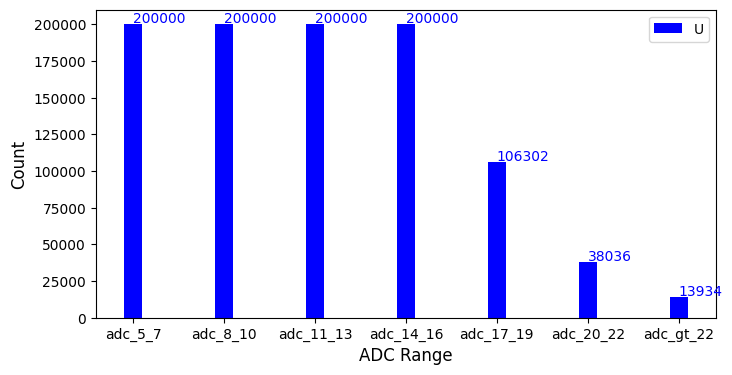

In [5]:
fig = plt.figure(figsize=(8,4))
x_labels = [pp.group_num_labels[i] for i in range(7)]
bar_width = 0.2

plt.bar([i for i in range(7)], dataset[1], width=bar_width, color='blue', label=wireplane)

for i in range(7):
    dist = 1000
    plt.text(i, dataset[1][i] + dist, dataset[1][i], color='blue', size=10)

plt.xticks([i for i in range(7)], x_labels)
plt.legend()
plt.xlabel('ADC Range', size=12)
plt.ylabel('Count', size=12)
plt.show()

### get additonal samples for adc_gt_21 from NU_CC and NU_ES

In [6]:
path = '/home/vlian/Workspace/train_dune_lartpc_v2/'
nticks = 200
ADC_MIN = 15
signal_waveforms, clean_signal_waveforms, noise_waveforms, noiseless_waveform = pp.process_data(wireplane=wireplane, path=path, ADC_MIN=ADC_MIN)

for i in range(10):
    signal_waveforms, clean_signal_waveforms = shuffle(signal_waveforms, clean_signal_waveforms)

nu_cc:  /home/vlian/Workspace/train_dune_lartpc_v2/nu_cc/
nu_es:  /home/vlian/Workspace/train_dune_lartpc_v2/nu_es/
noise:  /home/vlian/Workspace/more-noise/

----------loading----------
--------data loaded!-------
---------------------------------
     signal+noise:  218916
     clean signal:  218916
     noise       :  1400000
---------------------------------

filtering out small signals --> ADC > 15
     noise+signal :  (218916, 200)
     clean signal :  (218916, 200)
------------after filtering------------
     noise+signal :  (90708, 200)
     clean signal :  (90708, 200)


In [7]:
nu_es_cc_grouped_by_ADC = pp.adc_grouping(signal_waveforms, clean_signal_waveforms)
nu_es_cc_grouped_by_ADC = np.array(nu_es_cc_grouped_by_ADC, dtype=object)
for_combining = nu_es_cc_grouped_by_ADC[:, :7]

 0: adc_5_7             1: adc_8_10             2: adc_11_13             3: adc_14_16             4: adc_17_19             5: adc_20_22             6: adc_gt_22           

adc_5_7
count       0

adc_8_10
count       0

adc_11_13
count       0

adc_14_16
count       3894

adc_17_19
count       4987

adc_20_22
count       4366

adc_gt_22
count       77461

     Total:    90708


In [8]:
waves_idx = 0
count_idx = 1
x_idx = 0
y_idx= 1
# sudo code
for adc_group_idx in range(7):
    if len(for_combining[waves_idx][adc_group_idx][x_idx]) > 0 and len(dataset[waves_idx][adc_group_idx][y_idx]) < 200000:
        dataset[waves_idx][adc_group_idx][x_idx] += for_combining[waves_idx][adc_group_idx][x_idx]
        dataset[waves_idx][adc_group_idx][y_idx] += for_combining[waves_idx][adc_group_idx][y_idx]
        
        print('Debug: ', len(dataset[waves_idx][adc_group_idx][x_idx]), len(for_combining[waves_idx][adc_group_idx][x_idx]))
        
        dataset[count_idx][adc_group_idx] += len(for_combining[waves_idx][adc_group_idx][x_idx])




Debug:  111289 4987
Debug:  42402 4366
Debug:  91395 77461


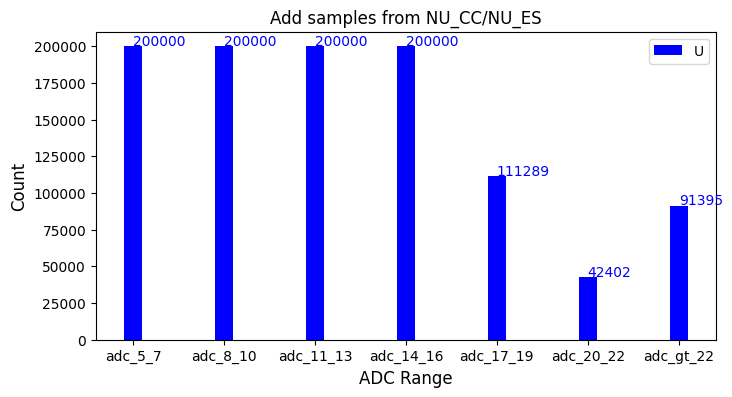

In [9]:
fig = plt.figure(figsize=(8,4))
x_labels = [pp.group_num_labels[i] for i in range(7)]
bar_width = 0.2

plt.bar([i for i in range(7)], dataset[1], width=bar_width, color='blue', label=wireplane)
plt.title('Add samples from NU_CC/NU_ES')

for i in range(7):
    dist = 1000
    plt.text(i, dataset[1][i] + dist, dataset[1][i], color='blue', size=10)

plt.xticks([i for i in range(7)], x_labels)
plt.legend()
plt.xlabel('ADC Range', size=12)
plt.ylabel('Count', size=12)
plt.show()

In [10]:
for i in range(7):
    print(len(dataset[0][i][0]))

200000
200000
200000
200000
111289
42402
91395


In [11]:
dataset.shape

(2, 7)

In [12]:
waves_idx = 0
count_idx = 1
x_idx = 0
y_idx= 1
adc_grp = 6

In [13]:
len(dataset[waves_idx][adc_grp][x_idx])

91395

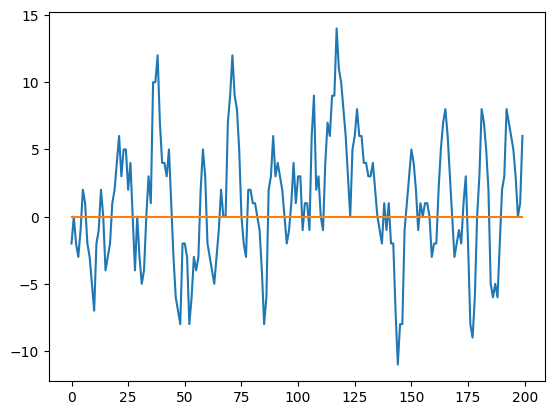

In [14]:
plt.plot(noise_waveforms[0])
plt.plot(noiseless_waveform[0])

In [15]:
full_5_7_x = dataset[waves_idx][0][x_idx].copy()
full_5_7_y = dataset[waves_idx][0][y_idx].copy()

In [16]:
full_8_10_x = dataset[waves_idx][1][x_idx].copy()
full_8_10_y = dataset[waves_idx][1][y_idx].copy()

In [17]:
full_11_13_x = dataset[waves_idx][2][x_idx].copy()
full_11_13_y = dataset[waves_idx][2][y_idx].copy()

In [18]:
full_14_16_x = dataset[waves_idx][3][x_idx].copy()
full_14_16_y = dataset[waves_idx][3][y_idx].copy()

In [19]:
full_17_19_x = dataset[waves_idx][4][x_idx].copy()
full_17_19_y = dataset[waves_idx][4][y_idx].copy()

In [20]:
full_20_22_x = dataset[waves_idx][5][x_idx].copy()
full_20_22_y = dataset[waves_idx][5][y_idx].copy()


In [21]:
full_gt_22_x = dataset[waves_idx][6][x_idx].copy()
full_gt_22_y = dataset[waves_idx][6][y_idx].copy()

### split train_test

In [22]:
for i in range(10):
    noise_waveforms, noiseless_waveform = shuffle(noise_waveforms, noiseless_waveform)

In [23]:
print(len(noise_waveforms), len(noiseless_waveform))

1400000 1400000


In [24]:
x_train_5_7, x_test_5_7, y_train_5_7, y_test_5_7 = train_test_split(
                                                    full_5_7_x, full_5_7_y, test_size=0.5, shuffle=True)
print(len(x_train_5_7), len(x_test_5_7), len(y_train_5_7), len(y_test_5_7))

noise_indx = 0
x_noise_train = noise_waveforms[noise_indx:len(x_train_5_7)]
y_noise_train = noiseless_waveform[noise_indx:len(x_train_5_7)]

noise_indx += len(x_train_5_7)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_5_7)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_5_7)]
noise_indx += len(x_train_5_7)

x_train_5_7 = np.concatenate((x_train_5_7, x_noise_train))
y_train_5_7 = np.concatenate((y_train_5_7, y_noise_train))

x_test_5_7 = np.concatenate((x_test_5_7, x_noise_test))
y_test_5_7 = np.concatenate((y_test_5_7, y_noise_test))

print(len(x_train_5_7), len(x_test_5_7), len(y_train_5_7), len(y_test_5_7))

for i in range(10):
    x_train_5_7, y_train_5_7 = shuffle(x_train_5_7, y_train_5_7)
    x_test_5_7, y_test_5_7 = shuffle(x_test_5_7, y_test_5_7)

100000 100000 100000 100000
200000 200000 200000 200000


In [25]:
x_train_8_10, x_test_8_10, y_train_8_10, y_test_8_10 = train_test_split(
                                                    full_8_10_x, full_8_10_y, test_size=0.5, shuffle=True)
print(len(x_train_8_10), len(x_test_8_10), len(y_train_8_10), len(y_test_8_10))

x_noise_train = noise_waveforms[noise_indx:noise_indx + len(x_train_8_10)]
y_noise_train = noiseless_waveform[noise_indx:noise_indx + len(x_train_8_10)]

noise_indx += len(x_train_8_10)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_8_10)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_8_10)]
noise_indx += len(x_train_8_10)


x_train_8_10 = np.concatenate((x_train_8_10, x_noise_train))
y_train_8_10 = np.concatenate((y_train_8_10, y_noise_train))

x_test_8_10 = np.concatenate((x_test_8_10, x_noise_test))
y_test_8_10 = np.concatenate((y_test_8_10, y_noise_test))

print(len(x_train_8_10), len(x_test_8_10), len(y_train_8_10), len(y_test_8_10))

for i in range(10):
    x_train_8_10, y_train_8_10 = shuffle(x_train_8_10, y_train_8_10)
    x_test_8_10, y_test_8_10 = shuffle(x_test_8_10, y_test_8_10)


100000 100000 100000 100000
200000 200000 200000 200000


In [26]:
x_train_11_13, x_test_11_13, y_train_11_13, y_test_11_13 = train_test_split(
                                                    full_11_13_x, full_11_13_y, test_size=0.5, shuffle=True)
print(len(x_train_11_13), len(x_test_11_13), len(y_train_11_13), len(y_test_11_13))

x_noise_train = noise_waveforms[noise_indx:noise_indx + len(x_train_11_13)]
y_noise_train = noiseless_waveform[noise_indx:noise_indx + len(x_train_11_13)]

noise_indx += len(x_train_11_13)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_11_13)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_11_13)]
noise_indx += len(x_train_11_13)

x_train_11_13 = np.concatenate((x_train_11_13, x_noise_train))
y_train_11_13 = np.concatenate((y_train_11_13, y_noise_train))

x_test_11_13 = np.concatenate((x_test_11_13, x_noise_test))
y_test_11_13 = np.concatenate((y_test_11_13, y_noise_test))

print(len(x_train_11_13), len(x_test_11_13), len(y_train_11_13), len(y_test_11_13))

for i in range(10):
    x_train_11_13, y_train_11_13 = shuffle(x_train_11_13, y_train_11_13)
    x_test_11_13, y_test_11_13 = shuffle(x_test_11_13, y_test_11_13)

100000 100000 100000 100000
200000 200000 200000 200000


In [27]:
x_train_14_16, x_test_14_16, y_train_14_16, y_test_14_16 = train_test_split(
                                                    full_14_16_x, full_14_16_y, test_size=0.5, shuffle=True)
print(len(x_train_14_16), len(x_test_14_16), len(y_train_14_16), len(y_test_14_16))

x_noise_train = noise_waveforms[noise_indx:noise_indx + len(x_train_14_16)]
y_noise_train = noiseless_waveform[noise_indx:noise_indx + len(x_train_14_16)]

noise_indx += len(x_train_14_16)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_14_16)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_14_16)]
noise_indx += len(x_train_14_16)

x_train_14_16 = np.concatenate((x_train_14_16, x_noise_train))
y_train_14_16 = np.concatenate((y_train_14_16, y_noise_train))

x_test_14_16 = np.concatenate((x_test_14_16, x_noise_test))
y_test_14_16 = np.concatenate((y_test_14_16, y_noise_test))

print(len(x_train_14_16), len(x_test_14_16), len(y_train_14_16), len(y_test_14_16))

for i in range(10):
    x_train_14_16, y_train_14_16 = shuffle(x_train_14_16, y_train_14_16)
    x_test_14_16, y_test_14_16 = shuffle(x_test_14_16, y_test_14_16)

100000 100000 100000 100000
200000 200000 200000 200000


In [28]:
x_train_17_19, x_test_17_19, y_train_17_19, y_test_17_19 = train_test_split(
                                                    full_17_19_x, full_17_19_y, test_size=0.5, shuffle=True)
print(len(x_train_17_19), len(x_test_17_19), len(y_train_17_19), len(y_test_17_19))

x_noise_train = noise_waveforms[noise_indx:noise_indx + len(x_train_17_19)]
y_noise_train = noiseless_waveform[noise_indx:noise_indx + len(x_train_17_19)]

noise_indx += len(x_train_17_19)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_17_19)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_17_19)]
noise_indx += len(x_train_17_19)

x_train_17_19 = np.concatenate((x_train_17_19, x_noise_train))
y_train_17_19 = np.concatenate((y_train_17_19, y_noise_train))

x_test_17_19 = np.concatenate((x_test_17_19, x_noise_test))
y_test_17_19 = np.concatenate((y_test_17_19, y_noise_test))

print(len(x_train_17_19), len(x_test_17_19), len(y_train_17_19), len(y_test_17_19))

for i in range(10):
    x_train_17_19, y_train_17_19 = shuffle(x_train_17_19, y_train_17_19)
    x_test_17_19, y_test_17_19 = shuffle(x_test_17_19, y_test_17_19)

55644 55645 55644 55645
111288 111289 111288 111289


In [29]:
noise_indx

911288

In [30]:
x_train_20_22, x_test_20_22, y_train_20_22, y_test_20_22 = train_test_split(
                                                    full_20_22_x, full_20_22_y, test_size=0.5, shuffle=True)
print(len(x_train_20_22), len(x_test_20_22), len(y_train_20_22), len(y_test_20_22))

x_noise_train = noise_waveforms[noise_indx:noise_indx + len(x_train_20_22)]
y_noise_train = noiseless_waveform[noise_indx:noise_indx + len(x_train_20_22)]

noise_indx += len(x_train_20_22)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_20_22)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_20_22)]
noise_indx += len(x_train_20_22)

x_train_20_22 = np.concatenate((x_train_20_22, x_noise_train))
y_train_20_22 = np.concatenate((y_train_20_22, y_noise_train))

x_test_20_22 = np.concatenate((x_test_20_22, x_noise_test))
y_test_20_22 = np.concatenate((y_test_20_22, y_noise_test))

print(len(x_train_20_22), len(x_test_20_22), len(y_train_20_22), len(y_test_20_22))

for i in range(10):
    x_train_20_22, y_train_20_22 = shuffle(x_train_20_22, y_train_20_22)
    x_test_20_22, y_test_20_22 = shuffle(x_test_20_22, y_test_20_22)

21201 21201 21201 21201
42402 42402 42402 42402


In [31]:
x_train_gt_22, x_test_gt_22, y_train_gt_22, y_test_gt_22 = train_test_split(
                                                    full_gt_22_x, full_gt_22_y, test_size=0.5, shuffle=True)
print(len(x_train_gt_22), len(x_test_gt_22), len(y_train_gt_22), len(y_test_gt_22))

x_noise_train = noise_waveforms[noise_indx:noise_indx + len(x_train_gt_22)]
y_noise_train = noiseless_waveform[noise_indx:noise_indx + len(x_train_gt_22)]

noise_indx += len(x_train_gt_22)
x_noise_test = noise_waveforms[noise_indx:noise_indx + len(x_train_gt_22)]
y_noise_test = noiseless_waveform[noise_indx:noise_indx + len(x_train_gt_22)]
noise_indx += len(x_train_gt_22)

x_train_gt_22 = np.concatenate((x_train_gt_22, x_noise_train))
y_train_gt_22 = np.concatenate((y_train_gt_22, y_noise_train))

x_test_gt_22 = np.concatenate((x_test_gt_22, x_noise_test))
y_test_gt_22 = np.concatenate((y_test_gt_22, y_noise_test))

print(len(x_train_gt_22), len(x_test_gt_22), len(y_train_gt_22), len(y_test_gt_22))

for i in range(10):
    x_train_gt_22, y_train_gt_22 = shuffle(x_train_gt_22, y_train_gt_22)
    x_test_gt_22, y_test_gt_22 = shuffle(x_test_gt_22, y_test_gt_22)

45697 45698 45697 45698
91394 91395 91394 91395


In [32]:
%who

ADC_MIN	 ColumnTransformer	 PdfMerger	 StandardScaler	 adc_group_idx	 adc_grp	 bar_width	 clean_signal_waveforms	 count_idx	 
dataset	 dist	 fig	 for_combining	 full_11_13_x	 full_11_13_y	 full_14_16_x	 full_14_16_y	 full_17_19_x	 
full_17_19_y	 full_20_22_x	 full_20_22_y	 full_5_7_x	 full_5_7_y	 full_8_10_x	 full_8_10_y	 full_gt_22_x	 full_gt_22_y	 
i	 isfile	 join	 keras	 listdir	 load_model	 make_column_transformer	 noise_indx	 noise_waveforms	 
noiseless_waveform	 np	 nticks	 nu_es_cc_grouped_by_ADC	 os	 path	 pd	 plt	 pp	 
shuffle	 signal_waveforms	 sys	 tf	 train_test_split	 waves_idx	 wireplane	 x_idx	 x_labels	 
x_noise_test	 x_noise_train	 x_test_11_13	 x_test_14_16	 x_test_17_19	 x_test_20_22	 x_test_5_7	 x_test_8_10	 x_test_gt_22	 
x_train_11_13	 x_train_14_16	 x_train_17_19	 x_train_20_22	 x_train_5_7	 x_train_8_10	 x_train_gt_22	 y_idx	 y_noise_test	 
y_noise_train	 y_test_11_13	 y_test_14_16	 y_test_17_19	 y_test_20_22	 y_test_5_7	 y_test_8_10	 y_test_gt_22	 y_train_11_13

### split train_valid

In [33]:
x_train_5_7, x_valid_5_7, y_train_5_7, y_valid_5_7 = train_test_split(
                                                    x_train_5_7, y_train_5_7, test_size=0.2, shuffle=True)
print(len(x_train_5_7), len(x_valid_5_7), len(y_train_5_7), len(y_valid_5_7))

160000 40000 160000 40000


In [34]:
for i in range(10):
    x_train_5_7, y_train_5_7 = shuffle(x_train_5_7, y_train_5_7)
    x_valid_5_7, y_valid_5_7 = shuffle(x_valid_5_7, y_valid_5_7)

In [35]:
x_train_8_10, x_valid_8_10, y_train_8_10, y_valid_8_10 = train_test_split(
                                                    x_train_8_10, y_train_8_10, test_size=0.2, shuffle=True)
print(len(x_train_8_10), len(x_valid_8_10), len(y_train_8_10), len(y_valid_8_10))

for i in range(10):
    x_train_8_10, y_train_8_10 = shuffle(x_train_8_10, y_train_8_10)
    x_valid_8_10, y_valid_8_10 = shuffle(x_valid_8_10, y_valid_8_10)

160000 40000 160000 40000


In [36]:
x_train_11_13, x_valid_11_13, y_train_11_13, y_valid_11_13 = train_test_split(
                                                    x_train_11_13, y_train_11_13, test_size=0.2, shuffle=True)
print(len(x_train_11_13), len(x_valid_11_13), len(y_train_11_13), len(y_valid_11_13))

for i in range(10):
    x_train_11_13, y_train_11_13 = shuffle(x_train_11_13, y_train_11_13)
    x_valid_11_13, y_valid_11_13 = shuffle(x_valid_11_13, y_valid_11_13)

160000 40000 160000 40000


In [37]:
x_train_14_16, x_valid_14_16, y_train_14_16, y_valid_14_16 = train_test_split(
                                                    x_train_14_16, y_train_14_16, test_size=0.2, shuffle=True)
print(len(x_train_14_16), len(x_valid_14_16), len(y_train_14_16), len(y_valid_14_16))

for i in range(10):
    x_train_14_16, y_train_14_16 = shuffle(x_train_14_16, y_train_14_16)
    x_valid_14_16, y_valid_14_16 = shuffle(x_valid_14_16, y_valid_14_16)

160000 40000 160000 40000


In [38]:
x_train_17_19, x_valid_17_19, y_train_17_19, y_valid_17_19 = train_test_split(
                                                    x_train_17_19, y_train_17_19, test_size=0.2, shuffle=True)
print(len(x_train_17_19), len(x_valid_17_19), len(y_train_17_19), len(y_valid_17_19))

for i in range(10):
    x_train_17_19, y_train_17_19 = shuffle(x_train_17_19, y_train_17_19)
    x_valid_17_19, y_valid_17_19 = shuffle(x_valid_17_19, y_valid_17_19)

89030 22258 89030 22258


In [39]:
x_train_20_22, x_valid_20_22, y_train_20_22, y_valid_20_22 = train_test_split(
                                                    x_train_17_19, y_train_17_19, test_size=0.2, shuffle=True)
print(len(x_train_20_22), len(x_valid_20_22), len(y_train_20_22), len(y_valid_20_22))

for i in range(10):
    x_train_20_22, y_train_20_22 = shuffle(x_train_20_22, y_train_20_22)
    x_valid_20_22, y_valid_20_22 = shuffle(x_valid_20_22, y_valid_20_22)

71224 17806 71224 17806


In [40]:
x_train_gt_22, x_valid_gt_22, y_train_gt_22, y_valid_gt_22 = train_test_split(
                                                    x_train_gt_22, y_train_gt_22, test_size=0.2, shuffle=True)
print(len(x_train_gt_22), len(x_valid_gt_22), len(y_train_gt_22), len(y_valid_gt_22))

for i in range(10):
    x_train_gt_22, y_train_gt_22 = shuffle(x_train_gt_22, y_train_gt_22)
    x_valid_gt_22, y_valid_gt_22 = shuffle(x_valid_gt_22, y_valid_gt_22)

73115 18279 73115 18279


In [49]:
def dis_plots(x,y,num):
    for i in range(num):
        fig = plt.figure(figsize=(8,2))
        plt.plot(x[i])
        plt.plot(y[i])
        plt.show()
        

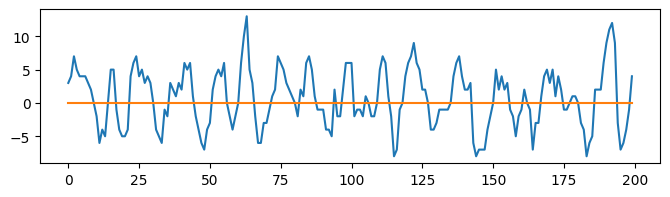

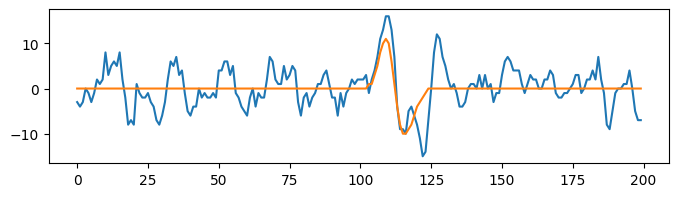

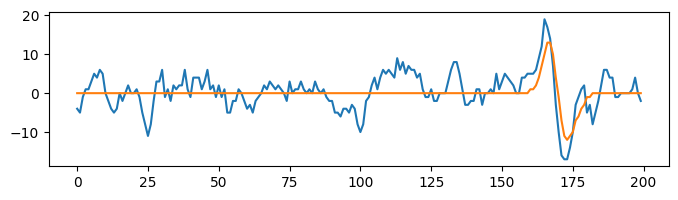

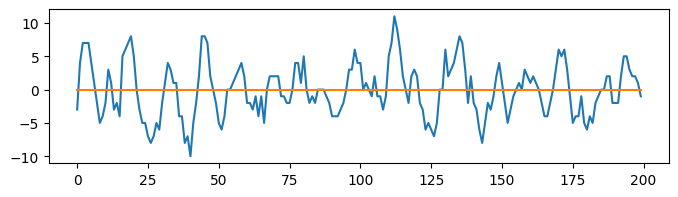

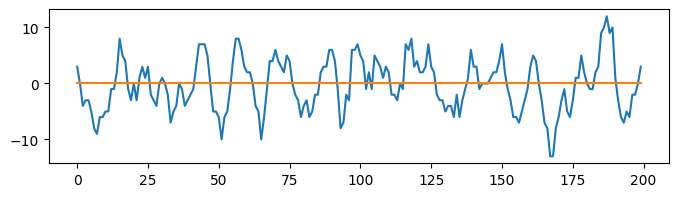

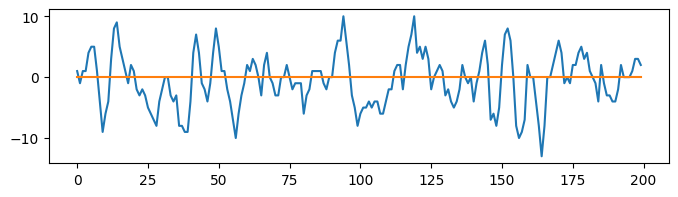

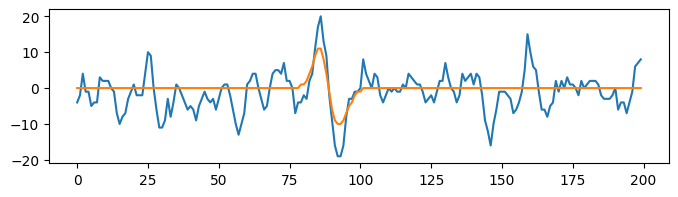

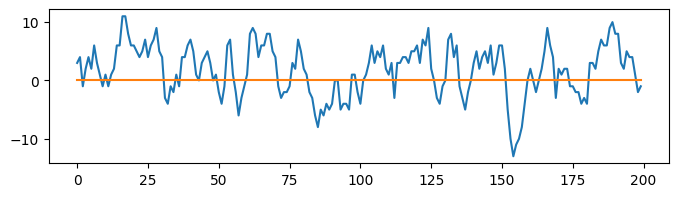

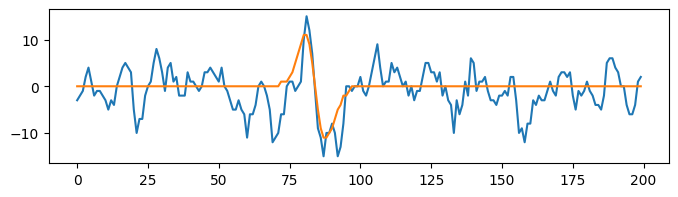

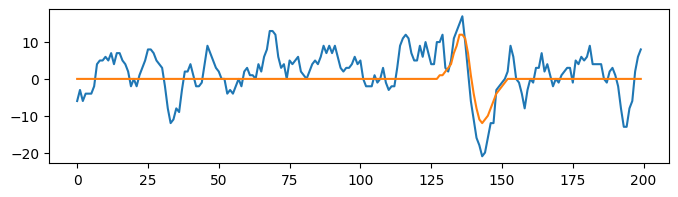

In [52]:
dis_plots(x_train_11_13, y_train_11_13, 10)

In [53]:
%who

ADC_MIN	 ColumnTransformer	 PdfMerger	 StandardScaler	 adc_group_idx	 adc_grp	 bar_width	 clean_signal_waveforms	 count_idx	 
dataset	 dis_plots	 dist	 fig	 for_combining	 full_11_13_x	 full_11_13_y	 full_14_16_x	 full_14_16_y	 
full_17_19_x	 full_17_19_y	 full_20_22_x	 full_20_22_y	 full_5_7_x	 full_5_7_y	 full_8_10_x	 full_8_10_y	 full_gt_22_x	 
full_gt_22_y	 i	 isfile	 join	 keras	 listdir	 load_model	 make_column_transformer	 noise_indx	 
noise_waveforms	 noiseless_waveform	 np	 nticks	 nu_es_cc_grouped_by_ADC	 os	 path	 pd	 plt	 
pp	 shuffle	 signal_waveforms	 sys	 tf	 train_test_split	 waves_idx	 wireplane	 x_idx	 
x_labels	 x_noise_test	 x_noise_train	 x_test_11_13	 x_test_14_16	 x_test_17_19	 x_test_20_22	 x_test_5_7	 x_test_8_10	 
x_test_gt_22	 x_train_11_13	 x_train_14_16	 x_train_17_19	 x_train_20_22	 x_train_5_7	 x_train_8_10	 x_train_gt_22	 x_valid_11_13	 
x_valid_14_16	 x_valid_17_19	 x_valid_20_22	 x_valid_5_7	 x_valid_8_10	 x_valid_gt_22	 y_idx	 y_noise_test	 y_noise_tr

In [58]:
grp0_ = np.array([[x_train_5_7, y_train_5_7], [x_valid_5_7, y_valid_5_7], [x_test_5_7, y_test_5_7]], dtype=object)
grp1_ = np.array([[x_train_8_10, y_train_8_10], [x_valid_8_10, y_valid_8_10], [x_test_8_10, y_test_8_10]], dtype=object)
grp2_ = np.array([[x_train_11_13, y_train_11_13], [x_valid_11_13, y_valid_11_13], [x_test_11_13, y_test_11_13]], dtype=object)
grp3_ = np.array([[x_train_14_16, y_train_14_16], [x_valid_14_16, y_valid_14_16], [x_test_14_16, y_test_14_16]], dtype=object)
grp4_ = np.array([[x_train_17_19, y_train_17_19], [x_valid_17_19, y_valid_17_19], [x_test_17_19, y_test_17_19]], dtype=object)
grp5_ = np.array([[x_train_20_22, y_train_20_22], [x_valid_20_22, y_valid_20_22], [x_test_20_22, y_test_20_22]], dtype=object)
grp6_ = np.array([[x_train_gt_22, y_train_gt_22], [x_valid_gt_22, y_valid_gt_22], [x_test_gt_22, y_test_gt_22]], dtype=object)

np.savez_compressed('/home/vlian/Workspace/curriculum_learning_processed_data/samples',
                    adc_5_7=grp0_, adc_8_10=grp1_, adc_11_13=grp2_, 
                    adc_14_16=grp3_, adc_17_19=grp4_, adc_20_22=grp5_, adc_gt_22=grp6_)


In [59]:
np.savez_compressed('/home/vlian/Workspace/curriculum_learning_processed_data/samples',
                    adc_5_7=grp0_, adc_8_10=grp1_, adc_11_13=grp2_, 
                    adc_14_16=grp3_, adc_17_19=grp4_, adc_20_22=grp5_, adc_gt_22=grp6_)

In [62]:
loaded = np.load('/home/vlian/Workspace/curriculum_learning_processed_data/samples.npz', allow_pickle=True)

In [70]:
print(np.array_equal(grp0_[0][0], loaded['adc_5_7'][0][0]))
print(np.array_equal(grp0_[1][0], loaded['adc_5_7'][1][0]))
print(np.array_equal(grp0_[1][1], loaded['adc_5_7'][1][1]))
print(np.array_equal(grp0_[0][1], loaded['adc_5_7'][0][1]))

True
True
True
True


In [72]:
print(np.array_equal(grp1_[0][0], loaded['adc_8_10'][0][0]))
print(np.array_equal(grp1_[1][0], loaded['adc_8_10'][1][0]))
print(np.array_equal(grp1_[1][1], loaded['adc_8_10'][1][1]))
print(np.array_equal(grp1_[0][1], loaded['adc_8_10'][0][1]))

True
True
True
True


In [73]:
print(np.array_equal(grp2_[0][0], loaded['adc_11_13'][0][0]))
print(np.array_equal(grp2_[1][0], loaded['adc_11_13'][1][0]))
print(np.array_equal(grp2_[1][1], loaded['adc_11_13'][1][1]))
print(np.array_equal(grp2_[0][1], loaded['adc_11_13'][0][1]))

True
True
True
True


In [74]:
print(np.array_equal(grp3_[0][0], loaded['adc_14_16'][0][0]))
print(np.array_equal(grp3_[1][0], loaded['adc_14_16'][1][0]))
print(np.array_equal(grp3_[1][1], loaded['adc_14_16'][1][1]))
print(np.array_equal(grp3_[0][1], loaded['adc_14_16'][0][1]))

True
True
True
True


In [75]:
print(np.array_equal(grp4_[0][0], loaded['adc_17_19'][0][0]))
print(np.array_equal(grp4_[1][0], loaded['adc_17_19'][1][0]))
print(np.array_equal(grp4_[1][1], loaded['adc_17_19'][1][1]))
print(np.array_equal(grp4_[0][1], loaded['adc_17_19'][0][1]))

True
True
True
True


In [76]:
print(np.array_equal(grp5_[0][0], loaded['adc_20_22'][0][0]))
print(np.array_equal(grp5_[1][0], loaded['adc_20_22'][1][0]))
print(np.array_equal(grp5_[1][1], loaded['adc_20_22'][1][1]))
print(np.array_equal(grp5_[0][1], loaded['adc_20_22'][0][1]))

True
True
True
True


In [77]:
print(np.array_equal(grp6_[0][0], loaded['adc_gt_22'][0][0]))
print(np.array_equal(grp6_[1][0], loaded['adc_gt_22'][1][0]))
print(np.array_equal(grp6_[1][1], loaded['adc_gt_22'][1][1]))
print(np.array_equal(grp6_[0][1], loaded['adc_gt_22'][0][1]))

True
True
True
True
